## PV-production forecast analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
forecasts = pd.read_csv("../src/data/solcast_cleaned.csv", parse_dates = ["time"])
forecasts.head(3)

,time,temp,GHI,GHI90,GHI10,collected
0,2021-02-10 12:30:00,-6,128,263,13,2021-02-10 12:00:00
1,2021-02-10 12:40:00,-6,150,246,43,2021-02-10 12:00:00
2,2021-02-10 12:50:00,-6,150,246,43,2021-02-10 12:00:00


In [3]:
train = pd.read_csv("../src/data/8.4_train.csv", parse_dates = ["date"]).set_index("date").fillna(0)
test = pd.read_csv("../src/data/8.4_test.csv", parse_dates = ["date"]).set_index("date").fillna(0)
train.head(2)

,airTemp,GHI,PAI,L,PV
date,,,,,
2021-03-18 00:00:00,0.0,0.0,0.0,129.75000,0.0
2021-03-18 00:10:00,0.0,0.0,0.0,127.40625,0.0


In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = train.filter(["airTemp", "GHI"])
y = train.filter(["PV"])
X_test = test.filter(["airTemp", "GHI"])
y_test = test.filter(["PV"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, shuffle=False)
X_train.shape, y_train.shape, X_test.shape, y_val.shape

((1224, 2), (1224, 1), (1584, 2), (216, 1))

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

Mean squared error 21.480984612764363
Mean absolute error 2.821113549926496


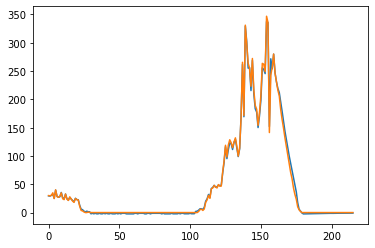

In [8]:
y_pred_val = regr.predict(X_val)
plt.plot(range(y_pred_val.shape[0]), y_pred_val)
plt.plot(range(y_val.shape[0]), y_val)

print("Mean squared error", mean_squared_error(y_val, y_pred_val))
print("Mean absolute error", mean_absolute_error(y_val, y_pred_val))

Mean squared error 58.72498613494911
Mean absolute error 4.568883188154633


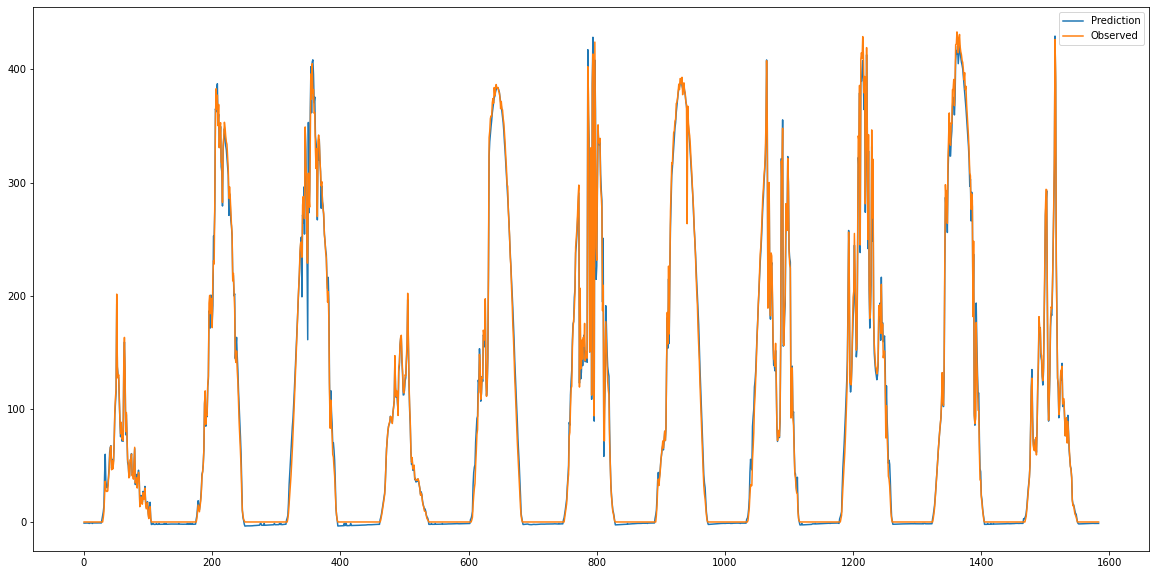

In [10]:
y_pred = regr.predict(X_test)

plt.figure(figsize = (20,10))
plt.plot(range(y_pred.shape[0]), y_pred, label = "Prediction")
plt.plot(range(y_test.shape[0]), y_test, label = "Observed")
plt.legend()

print("Mean squared error", mean_squared_error(y_test, y_pred))
print("Mean absolute error", mean_absolute_error(y_test, y_pred))


In [39]:
from scipy import fftpack

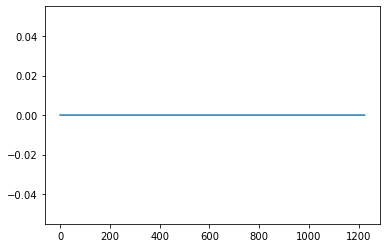

In [51]:
y_fft = np.fft.fft(y_train)
